# 1. Instale la librería scapy: https://scapy.net/
2. Tutorial de uso:
https://guedou.github.io/talks/2022_GreHack/Scapy%20in%200x30%20minutes.slides.html

# 3. Verifique que la herramienta fue correctamente instalada:

a. Capture 25 paquetes de su red doméstica (no de la red de la UVG) y asígnelos a una
variable.

b. Imprima el tipo de variable, la longitud y el contenido de la variable.

c. Imprima el tipo de dato del primer paquete capturado.

d. Imprima el contenido de 5 paquetes

a. Capture 25 paquetes de su red doméstica (no de la red de la UVG) y asígnelos a una
variable

In [ ]:
from scapy.all import sniff

# Captura 25 paquetes desde una red doméstica
paquetes = sniff(count=25)




b. Imprima el tipo de variable, la longitud y el contenido de la variable

In [4]:
print("Tipo de variable:", type(paquetes))
print("Cantidad de paquetes capturados:", len(paquetes))
print("Contenido de la variable:")
print(paquetes)


Tipo de variable: <class 'scapy.plist.PacketList'>
Cantidad de paquetes capturados: 24
Contenido de la variable:
<Sniffed: TCP:24 UDP:0 ICMP:0 Other:0>


c. Imprima el tipo de dato del primer paquete capturado.

In [5]:
print("Tipo de dato del primer paquete:", type(paquetes[0]))


Tipo de dato del primer paquete: <class 'scapy.layers.l2.Ether'>


d. Imprima el contenido de 5 paquetes

In [6]:
print("Contenido de los primeros 5 paquetes:")
for i in range(5):
    print(f"Paquete {i+1}:")
    print(paquetes[i])
    print("-" * 40)


Contenido de los primeros 5 paquetes:
Paquete 1:
Ether / IP / TCP 172.64.150.27:https > 192.168.68.62:51014 PA / Raw
----------------------------------------
Paquete 2:
Ether / IP / TCP 172.64.150.27:https > 192.168.68.62:51014 PA / Raw
----------------------------------------
Paquete 3:
Ether / IP / TCP 192.168.68.62:51014 > 172.64.150.27:https A
----------------------------------------
Paquete 4:
Ether / IP / TCP 192.168.68.62:51014 > 172.64.150.27:https PA / Raw
----------------------------------------
Paquete 5:
Ether / IP / TCP 172.64.150.27:https > 192.168.68.62:51014 A
----------------------------------------


Análisis estadístico
1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.
2. Convierta la variable a un DataFrame.
3. Muestre el contenido de las primeras 5 filas del dataset.
4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.
5. Estadísticas
a. Muestre todas las IP origen
b. Muestre todas las IP destino
c. ¿Cuál es la IP origen más frecuente?
i. ¿A qué IP destino se comunica con más frecuencia?
ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?


1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.

In [ ]:
from scapy.all import rdpcap, IP, TCP
import pandas as pd


paquetes = rdpcap("analisis_paquetes.pcap")


2: Convertir los paquetes a un DataFrame

In [11]:
print("Cantidad de paquetes leídos:", len(paquetes))


Cantidad de paquetes leídos: 62


In [36]:
from scapy.all import rdpcap, IP, TCP, UDP
import pandas as pd


paquetes = rdpcap("analisis_paquetes.pcap")

datos = []

for pkt in paquetes:
    if IP in pkt:
        src_ip = pkt[IP].src
        dst_ip = pkt[IP].dst

        if TCP in pkt:
            src_port = pkt[TCP].sport
            dst_port = pkt[TCP].dport
        elif UDP in pkt:
            src_port = pkt[UDP].sport
            dst_port = pkt[UDP].dport
        else:
            src_port = None
            dst_port = None

        payload_len = len(pkt.payload)
        timestamp = pkt.time 

        datos.append({
            'Src Address': src_ip,
            'Dst Address': dst_ip,
            'Src Port': src_port,
            'Dst Port': dst_port,
            'payload': payload_len,
            'time': timestamp 
        })

# Crear el DataFrame
df = pd.DataFrame(datos)



3. Muestre el contenido de las primeras 5 filas del dataset.

In [17]:
print(df.head())


   Src Address  Dst Address  Src Port  Dst Port
0   10.1.10.53  84.54.22.33        53        53
1  84.54.22.33   10.1.10.53        53        53
2   10.1.10.53  84.54.22.33        53        53
3  84.54.22.33   10.1.10.53        53        53
4   10.1.10.53  84.54.22.33        53        53


4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.

In [18]:
print(df[['Src Address', 'Dst Address', 'Src Port', 'Dst Port']])


    Src Address  Dst Address  Src Port  Dst Port
0    10.1.10.53  84.54.22.33        53        53
1   84.54.22.33   10.1.10.53        53        53
2    10.1.10.53  84.54.22.33        53        53
3   84.54.22.33   10.1.10.53        53        53
4    10.1.10.53  84.54.22.33        53        53
..          ...          ...       ...       ...
57  84.54.22.33   10.1.10.53        53        53
58   10.1.10.53  84.54.22.33        53        53
59  84.54.22.33   10.1.10.53        53        53
60   10.1.10.53  84.54.22.33        53        53
61  84.54.22.33   10.1.10.53        53        53

[62 rows x 4 columns]


a. Muestre todas las IP origen

In [19]:
print("IPs de origen únicas:")
print(df['Src Address'].unique())


IPs de origen únicas:
['10.1.10.53' '84.54.22.33' '75.75.75.75']


b. Muestre todas las IP destino

In [20]:
print("IPs de destino únicas:")
print(df['Dst Address'].unique())


IPs de destino únicas:
['84.54.22.33' '10.1.10.53' '75.75.75.75']


¿Cuál es la IP origen más frecuente?
i. ¿A qué IP destino se comunica con más frecuencia?
ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?
i. ¿Desde que puertos origen se comunica?

In [21]:
ip_origen_frecuente = df['Src Address'].value_counts().idxmax()
print("IP origen más frecuente:", ip_origen_frecuente)


IP origen más frecuente: 10.1.10.53


In [22]:
ip_destino_frecuente = df[df['Src Address'] == ip_origen_frecuente]['Dst Address'].value_counts().idxmax()
print("IP destino más frecuente para esa IP origen:", ip_destino_frecuente)


IP destino más frecuente para esa IP origen: 84.54.22.33


In [23]:
puerto_destino_frecuente = df[df['Src Address'] == ip_origen_frecuente]['Dst Port'].mode()[0]
print("Puerto destino más frecuente:", puerto_destino_frecuente)


Puerto destino más frecuente: 53


In [24]:
import socket

def obtener_servicio_puerto(puerto):
    try:
        return socket.getservbyport(int(puerto))
    except:
        return "Desconocido"

print("Propósito del puerto destino:", obtener_servicio_puerto(puerto_destino_frecuente))


Propósito del puerto destino: domain


In [25]:
puertos_origen_usados = df[df['Src Address'] == ip_origen_frecuente]['Src Port'].dropna().unique()
print("Puertos de origen utilizados por esa IP:", list(puertos_origen_usados))


Puertos de origen utilizados por esa IP: [np.int64(53), np.int64(15812), np.int64(23903)]


## ¿Cuál es la IP origen más frecuente?	
10.1.10.53

## ¿A qué IP destino se comunica con más frecuencia?	
84.54.22.33

## ¿A qué puerto destino se comunica más frecuentemente?	
53

## ¿Cuál es el propósito de ese puerto?	
domain (es decir, DNS)

## ¿Desde qué puertos origen se comunica?	
[53, 15812, 23903]

# 6. Gráficas
a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la
suma de los payloads (bytes) enviados desde dichas direcciones.

b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X
la suma de los payloads (bytes) recibidos en dichas direcciones.

c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el
eje X la suma de los payloads (bytes) enviados de dichos puertos.

d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el
eje X la suma de los payloads (bytes) recibidos en dichos puertos.

e. Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el
eje X el tiempo, para la IP origen más frecuente.

f. Utilizando la información de las estadísticas y la información del comportamiento del
tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común
el comportamiento

a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la
suma de los payloads (bytes) enviados desde dichas direcciones.

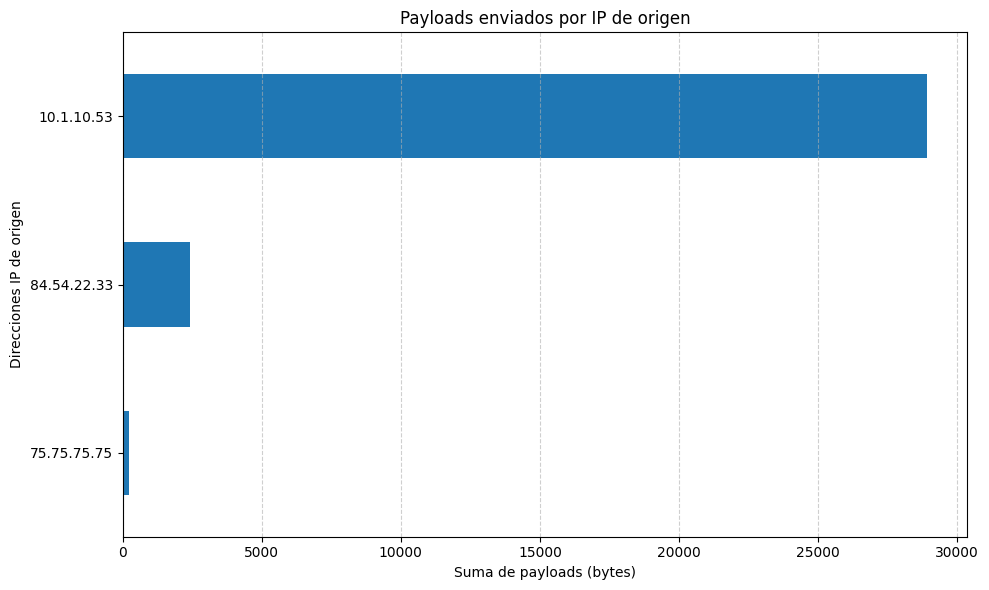

In [30]:
import matplotlib.pyplot as plt

payloads_por_ip = df.groupby('Src Address')['payload'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
payloads_por_ip.plot(kind='barh')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('Direcciones IP de origen')
plt.title('Payloads enviados por IP de origen')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X
la suma de los payloads (bytes) recibidos en dichas direcciones.

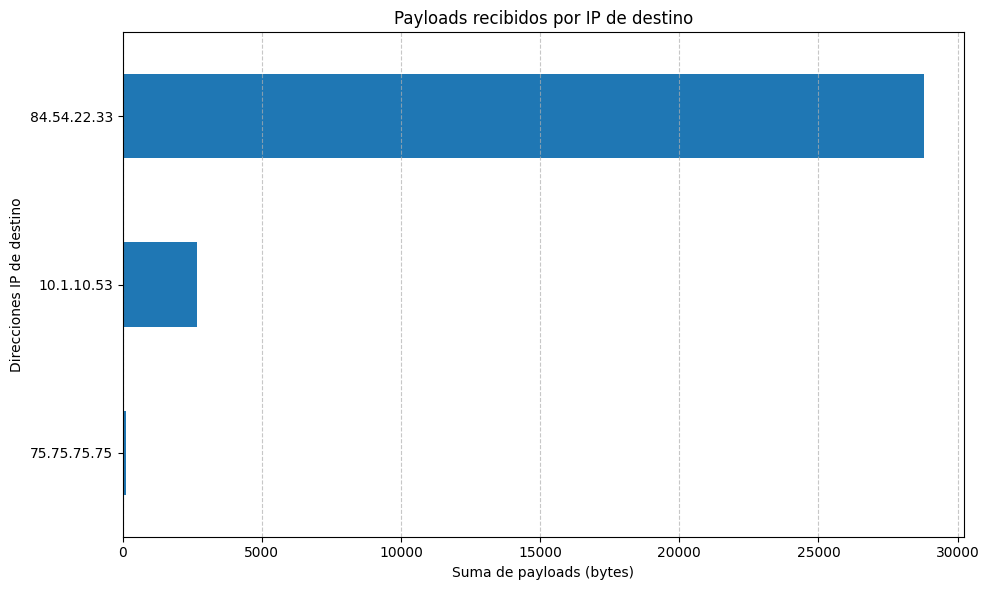

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por IP destino y sumar el payload
payloads_por_destino = df.groupby('Dst Address')['payload'].sum().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
payloads_por_destino.plot(kind='barh')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('Direcciones IP de destino')
plt.title('Payloads recibidos por IP de destino')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el
eje X la suma de los payloads (bytes) enviados de dichos puertos

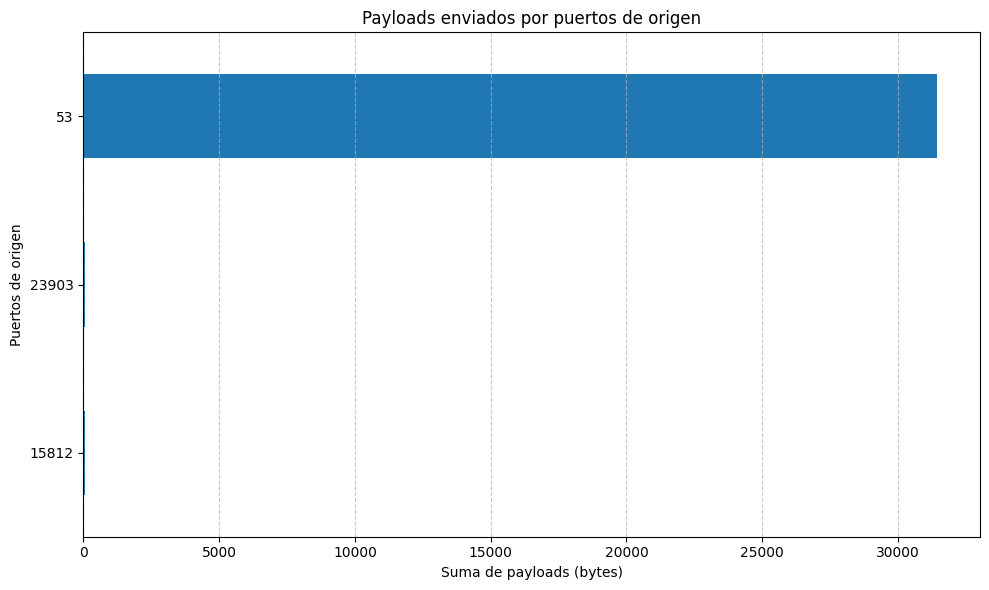

In [ ]:
# Agrupar por puerto de origen y sumar los payloads
payloads_por_puerto_origen = df.groupby('Src Port')['payload'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
payloads_por_puerto_origen.plot(kind='barh')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('Puertos de origen')
plt.title('Payloads enviados por puertos de origen')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el
eje X la suma de los payloads (bytes) recibidos en dichos puertos.

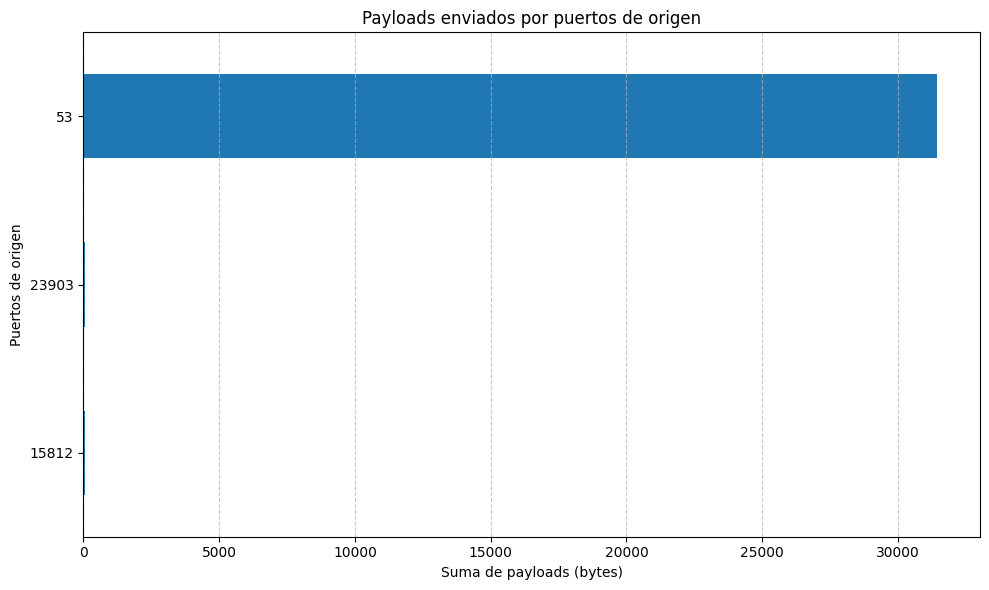

In [34]:

payloads_por_puerto_origen = df.groupby('Src Port')['payload'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
payloads_por_puerto_origen.plot(kind='barh')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('Puertos de origen')
plt.title('Payloads enviados por puertos de origen')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


e. Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el
eje X el tiempo, para la IP origen más frecuente.

C:\Users\marce\AppData\Local\Temp\ipykernel_24216\596187103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frecuente['rounded_time'] = df_frecuente['time'].round()


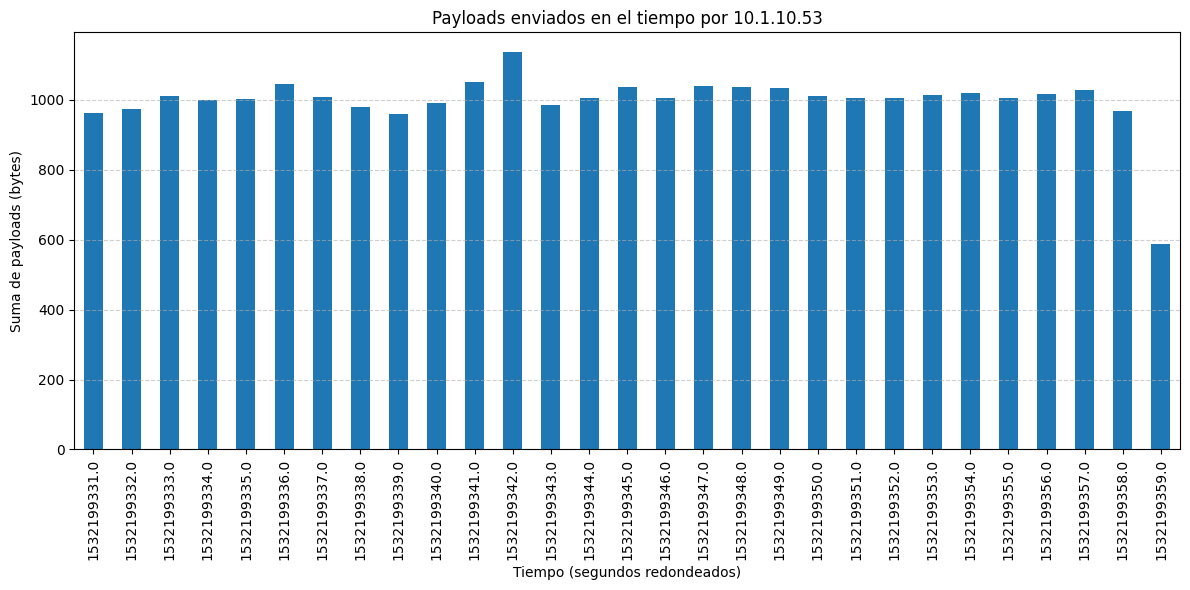

In [ ]:
ip_origen_frecuente = df['Src Address'].value_counts().idxmax()
df_frecuente = df[df['Src Address'] == ip_origen_frecuente]
df_frecuente['rounded_time'] = df_frecuente['time'].round()



df['time'] = df['time'].astype(float)


ip_origen_frecuente = df['Src Address'].value_counts().idxmax()
df_frecuente = df[df['Src Address'] == ip_origen_frecuente].copy()
df_frecuente['time'] = df_frecuente['time'].astype(float)
df_frecuente['rounded_time'] = df_frecuente['time'].round()
payloads_por_tiempo = df_frecuente.groupby('rounded_time')['payload'].sum()


plt.figure(figsize=(12, 6))
payloads_por_tiempo.plot(kind='bar')
plt.ylabel('Suma de payloads (bytes)')
plt.xlabel('Tiempo (segundos redondeados)')
plt.title(f'Payloads enviados en el tiempo por {ip_origen_frecuente}')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



f. Utilizando la información de las estadísticas y la información del comportamiento del
tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común
el comportamiento?

IP de origen más frecuente: 10.1.10.53
Esta dirección IP ha generado la mayor cantidad de tráfico.

IP de destino más común: 84.54.22.33
La comunicación se da principalmente con esta IP externa, podría deberse a una  interacción sostenida con un servidor remoto.

Puerto de destino más frecuente: 53
Este puerto corresponde al protocolo DNS (Domain Name System), que se utiliza para resolver nombres de dominio (como google.com) a direcciones IP.
Esto implica que la mayoría del tráfico analizado consiste en consultas DNS.

Puertos de origen variados (15812, 23903)
Los puertos de origen son puertos efímeros, que se asignan dinámicamente por el sistema operativo para realizar solicitudes salientes.
Este comportamiento es esperado y normal en solicitudes DNS.

Payloads enviados por IP origen
La IP 10.1.10.53 sobresale con más de 29,000 bytes transmitidos, lo que respalda que es el nodo generador principal del tráfico.

Payloads en el tiempo
El patrón es bastante regular (~1000 bytes/segundo), con una caída final. Este comportamiento indica una actividad estable y repetitiva (como consultas DNS automáticas o en ráfaga).

# 7. Investigación del payload
a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
más frecuente.


b. Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y
agrúpelas por dst y la suma del payload,

c. Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta
IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.

d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.

e. Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.

f. Muestre el contenido del array.

g. Observe los primeros bytes del contenido, ¿encuentra algún tipo de dato que no haga
sentido que se envíe al puerto destino? Describa lo que encontró.


a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
más frecuente.


In [ ]:

ip_origen_frecuente = df['Src Address'].value_counts().idxmax()


df_origen_frecuente = df[df['Src Address'] == ip_origen_frecuente]

print(df_origen_frecuente.head())


  Src Address  Dst Address  Src Port  Dst Port  payload          time
0  10.1.10.53  84.54.22.33        53        53      961  1.532199e+09
2  10.1.10.53  84.54.22.33        53        53      975  1.532199e+09
4  10.1.10.53  84.54.22.33        53        53     1012  1.532199e+09
6  10.1.10.53  84.54.22.33        53        53      998  1.532199e+09
8  10.1.10.53  84.54.22.33        53        53     1003  1.532199e+09
